In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
#%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv("../../../datasets/spam.csv",encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = data[['v1','v2']]
#df = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"text"})

In [5]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


Text(0.5,1,'Count of ham and spam messages')

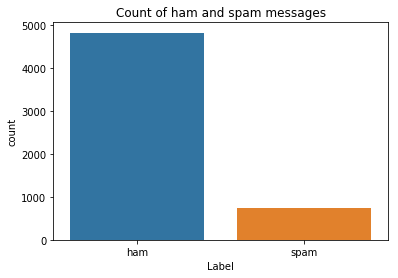

In [7]:
sns.countplot(df.label)
plt.xlabel('Label')
plt.title('Count of ham and spam messages')

In [8]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df["text"],df["label"], test_size = 0.2, random_state = 2)

In [11]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(4457,)
(4457,)
(1115,)
(1115,)


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vect = CountVectorizer()

In [14]:
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
print(vect.get_feature_names()[0:10])
print(vect.get_feature_names()[-10:])

['00', '000', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207']
['ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûò', 'ûówell']


In [16]:
x_train_df = vect.transform(x_train)

In [17]:
x_test_df = vect.transform(x_test)

In [18]:
type(x_test_df)

scipy.sparse.csr.csr_matrix

In [19]:
spam = df[df.label == 'spam']
ham = df[df.label == 'ham']

In [20]:
spam.head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [21]:
ham.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [23]:
#if nltk is not installed
!pip install nltk

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [24]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
spam_words = ''
ham_words = ''

In [27]:
for val in spam.text:
    text = val.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        ham_words = ham_words + words + ' '

In [28]:
from wordcloud import WordCloud

In [29]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

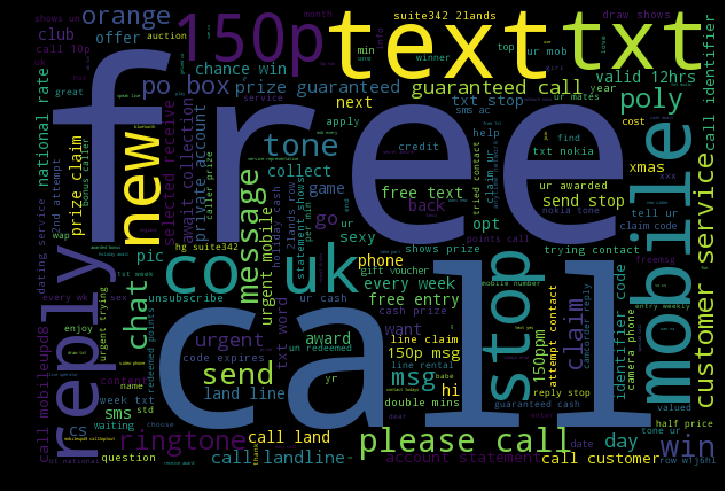

In [30]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

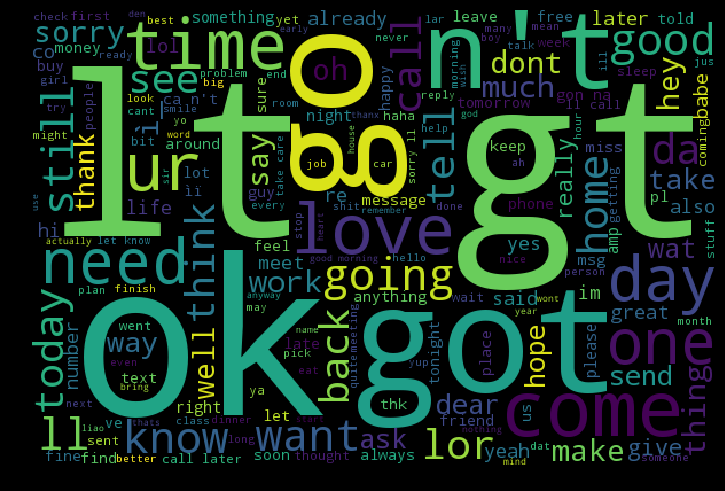

In [31]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [32]:
pred = {}
acc = {}
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
pred["multinomial"] = model.predict(x_test_df)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
acc['multinomial'] = accuracy_score(y_test,pred["multinomial"])

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
pred["logistic"] = model.predict(x_test_df)

In [40]:
acc['logistic'] = accuracy_score(y_test,pred["logistic"])

In [42]:
print(pred)

{'multinomial': array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'],
      dtype='<U4'), 'logistic': array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)}


In [43]:
print(acc)

{'multinomial': 0.98026905829596411, 'logistic': 0.97757847533632292}
